# **TD Algèbre linéaire**
28 Février 2022 - David Loiseaux et Fanny Simões

## **Avant d'utiliser ce notebook**

- Travailler sur une copie de ce notebook dans votre drive.
- Installer votre drive sur google colab grâce aux commandes ci dessous. Vous pouvez retrouver votre drive dans les fichiers ci-contre.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

## **Introduction à l'analyse d'image**

- Une image est composée de pixel.
- La valeur du pixel définit sa couleur et son intensité.
- Une image peut être considérée comme une grille dont chaque carreau correspond à un pixel. 



**Image en noir et blanc**

Cela correspond à une matrice dont les valeurs sont comprises entre 0 (noir) et 255 (blanc).

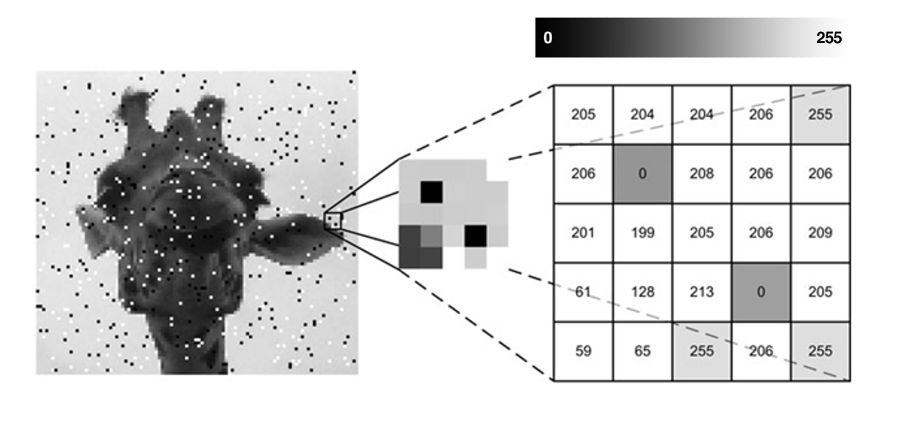

**Image de couleur**

Cela correspond à 3 matrices rouge/verte/bleue (RGB-channels). Pour chaque couleur les valeurs des pixels sont comprises entre 0 et 255.

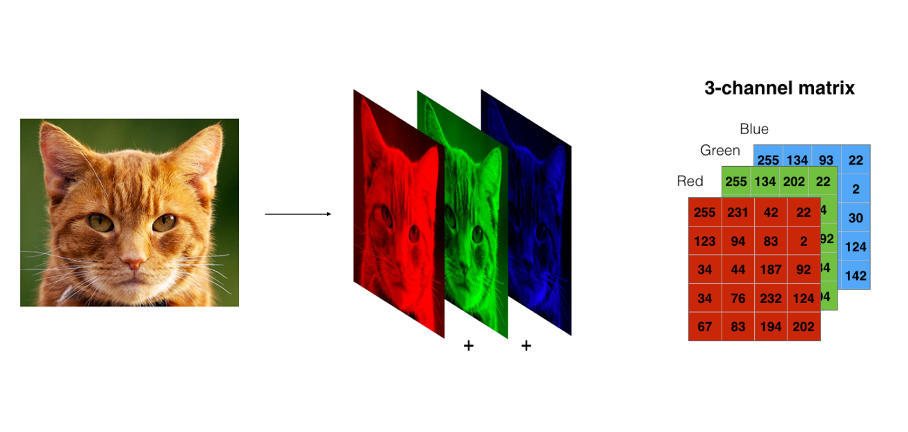

## **Exercice 1- Décomposition en valeurs singulières (SVD)**



In [ ]:
# Chargement des packages
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import svd

### A) Importer une image et l'afficher

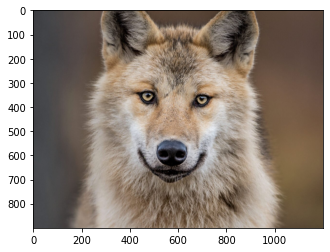

In [ ]:
# Importe et télécharge l'image avec matplotlib
pathImg = "/content/drive/MyDrive/TD_courscentrale/TD1_algebre/loup.jpeg"
img = image.imread(pathImg)
plt.imshow(img)
plt.show()

### B) Caractéritiques et traitement d'image

- **Afficher l'image sous forme de matrice**

In [ ]:
print(img)

[[[59 60 64]
  [60 61 65]
  [61 62 66]
  ...
  [93 74 60]
  [95 76 62]
  [95 76 62]]

 [[59 60 64]
  [60 61 65]
  [60 61 65]
  ...
  [93 74 60]
  [94 75 61]
  [95 76 62]]

 [[59 60 64]
  [59 60 64]
  [60 61 65]
  ...
  [93 74 60]
  [93 74 60]
  [94 75 61]]

 ...

 [[72 73 77]
  [71 72 76]
  [70 71 75]
  ...
  [90 75 52]
  [91 76 53]
  [89 77 53]]

 [[72 73 77]
  [71 72 76]
  [70 71 75]
  ...
  [90 75 52]
  [91 76 53]
  [89 77 53]]

 [[72 73 77]
  [71 72 76]
  [70 71 75]
  ...
  [90 75 52]
  [91 76 53]
  [89 77 53]]]


- **Quel est le format de l'image ?** 

In [ ]:
print("Format (height,width,channels):",img.shape)

Format (height,width,channels): (900, 1200, 3)


- **Visualiser l'image suivant les différents channels (RGB)**

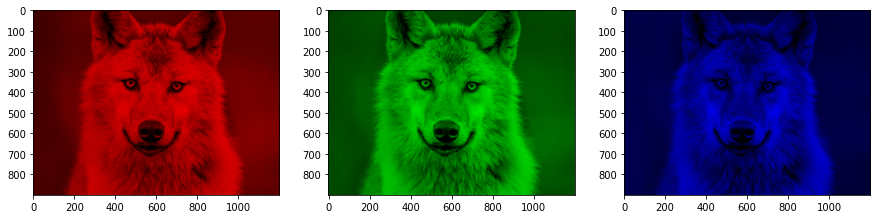

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5)) #size and format of figures

for c, ax in zip(range(3), ax): # c = 0, 1, 2
    
    # create zero matrix
    colorimg = np.zeros(img.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    colorimg[ :, :, c] = img[ :, :, c] 
    
    # display each channel
    ax.imshow(colorimg)

### C) Compression d'image avec la SVD

In [ ]:
# Création d'une fonction qui compresse l'image à l'aide de SVD
def compress_image(img_name,k): #img_name = le nom de l'image et k = le nombre de valeurs propres retenues
    print("processing...")
    img=img_name
    # Matrices de couleurs RGB
    r = img[:,:,0] #1 matrice couleur rouge
    g = img[:,:,1] #1 matrice couleur verte
    b = img[:,:,2] #1 matrice couleur bleue
        
    print("compressing...")
    # Appliquer la svd sur chaque matrices de couleurs
    #u matrice 2 dimensions, s 1 dimension, v 2 dimensions
    ur,sr,vr = svd(r, full_matrices=False)
    ug,sg,vg = svd(g, full_matrices=False)
    ub,sb,vb = svd(b, full_matrices=False)
    # Recomposition de l'image selon k valeurs singulières
    rr = np.dot(ur[:,:k],np.dot(np.diag(sr[:k]), vr[:k,:])) #np.dot= produit de matrices et np.diag = construction de matrice diagonale
    rg = np.dot(ug[:,:k],np.dot(np.diag(sg[:k]), vg[:k,:]))
    rb = np.dot(ub[:,:k],np.dot(np.diag(sb[:k]), vb[:k,:]))

    print("arranging...")
    rimg = np.zeros(img.shape) #recomposition de l'image avec les 3 channels, la size 900,1200 reste constante uniquement RGB change
    rimg[:,:,0] = rr
    rimg[:,:,1] = rg
    rimg[:,:,2] = rb

    # Condition : les valeurs des pixels doivent être compris entre 0 et 255
    for ind1, row in enumerate(rimg): 
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1,ind2,ind3] = abs(value)
                if value > 255: 
                    rimg[ind1,ind2,ind3] = 255

    compressed_image = rimg.astype(np.uint8)
    # Plot de l'image    
    plt.title("Image Name:" + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()

processing...
compressing...
arranging...


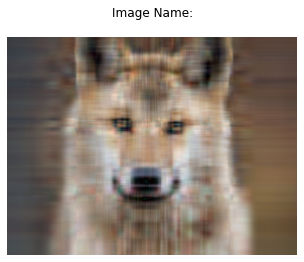

In [ ]:
# Appliquer la fonction de compression d'image selon k valeurs singulières
compress_image(img_name=img,k=10)